In [32]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *


In [33]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 0, it's a 'non-cat' picture.


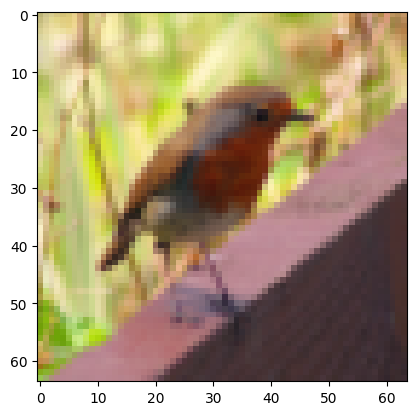

In [34]:
# Example of a picture
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [35]:
# Exercise 1
# Find the values for: - m_train (number of training examples) - m_test (number of test examples) - num_px (= height = width of a training image) 
# Remember that train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing train_set_x_orig.shape[0].

#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 

# print(test_set_x_orig.shape) # THIS REFERS TO THE WHOLE DATASET. ie m=50 IMAGES OF SIZE 64*64*3.
# print(test_set_x_orig[0][0][0].shape) # THIS REFERS TO A SINGLE PIXEL.
# print(test_set_x_orig[0].shape) # THIS REFERS TO A SINGLE IMAGE.

# print(train_set_x_orig.shape) # THIS REFERS TO THE WHOLE DATASET. ie m=209 IMAGES OF SIZE 64*64*3.
# print(train_set_x_orig[0].shape) # THIS REFERS TO A SINGLE IMAGE.
# print(train_set_x_orig[0][0][0].shape) # THIS REFERS TO A SINGLE PIXEL.


# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [36]:
# Exercise 2
# Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px*num_px*3, 1).

# A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d, a) is to use:
#                   X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1] * train_set_x_orig.shape[2] * train_set_x_orig.shape[3], train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1] * test_set_x_orig.shape[2] * test_set_x_orig.shape[3], test_set_x_orig.shape[0])
print(test_set_x_flatten[:10, 1])
# print(test_set_x_flatten.shape)
print(train_set_x_flatten[:10, 1])
# print(train_set_x_flatten.shape)
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(test_set_x_flatten[:10, 1])
# print(test_set_x_flatten.shape)
print(train_set_x_flatten[:10, 1])
# print(train_set_x_flatten.shape)
# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

[104 165  94 126 163  96 122 171  84 117]
[31 34 79 46 33 69 36 20 67 31]
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
[115 110 111 137 129 129 155 146 145 159]
[196 192 190 193 186 182 188 179 174 213]
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [37]:
# ONLY FOR PERSONAL TESTING PURPOSE.
# I DID NOT UNDERSTAND HOW CHANGING a*b*c*d INTO (b*c*d, a) IS DIFFERENT FROM DOING (a, b*c*d).T
# THEY ARE DIFFERENT (PROVEN BELOW), BUT WHY?

test = np.array([
    [[1,2], [3,4], [5,6]],
    [[7,8], [9,10], [11,12]]
])
print(test.shape)
print("test:", test)

test1 = test.reshape(6, 2)
test2 = test.reshape(2, -1)
test3 = test2.T

print("test1:\n", test1)
print("test2:\n", test2)
print("test3:\n", test3)

(2, 3, 2)
test: [[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
test1:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
test2:
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
test3:
 [[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]


In [38]:
# STANDARDIZING THE DATA
# One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each 
# example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works 
# almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

test_set_x = test_set_x_flatten/255
train_set_x = train_set_x_flatten/255


In [39]:
# Exercise 3 - sigmoid

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [40]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [41]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [42]:
# GRADED FUNCTION: initialize_with_zeros
# Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() 
# in the Numpy library's documentation.



def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim, 1))
    b = 0.0
    
    # YOUR CODE ENDS HERE

    return w, b

In [43]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


In [44]:
# GRADED FUNCTION: propagate
# Implement a function propagate() that computes the cost function and its gradient.

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    # FORWARD PROPAGATION
    m = X.shape[1]
    A = np.dot(w.T, X)
    A += b
    A = sigmoid(A)
    
    # cost = -1 * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) / m
    cost = np.sum((Y * np.log(A)) + (1-Y) * np.log(1-A))
    cost = -1 * cost / m

    # BACKWARD PROPAGATION
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m

    grads = {'dw':dw, 'db':db}
    cost = np.squeeze(np.array(cost))
    

    return grads, cost


In [45]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405
All tests passed!


In [83]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    w = copy.deepcopy(w) # WE CREATE A DEEPCOPY SO THAT WE DONT OVERWRITE THE ORIGINAL WEIGHTS AND BIASES
    b = copy.deepcopy(b) # WE CREATE A DEEPCOPY SO THAT WE DONT OVERWRITE THE ORIGINAL WEIGHTS AND BIASES
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']

        if(i % 100 == 0): 
            costs.append(cost)
            if print_cost: print(f"{i}th cost:", cost)
            

    params = {'w': w, 'b': b}

    return params, grads, costs


In [86]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


In [127]:
# GRADED FUNCTION: predict
# The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    Y_prediction = sigmoid(np.dot(w.T, X) + b)
    Y_prediction += 0.5
    Y_prediction = np.floor(Y_prediction)
    # print(Y_prediction.shape)
    # for prediction in Y_prediction[0]:
    #     if(prediction >= 0.5): prediction = 1
    #     else: prediction = 0

    return Y_prediction

In [128]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


In [156]:
# GRADED FUNCTION: model
# Implement the model function. Use the following notation: - Y_prediction_test for your predictions on the test set - Y_prediction_train for your predictions on 
# the train set - parameters, grads, costs for the outputs of optimize()


def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    m = X_train.shape[0]
    w, b = initialize_with_zeros(m)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params['w']
    b = params['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

     # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    test_accuracy = np.mean(np.abs(Y_prediction_test - Y_test))
    print("StG Method! test accuracy:", 1-test_accuracy)
    
    train_accuracy = np.mean(np.abs(Y_prediction_train - Y_train))
    print("StG Method! train accuracy:", 1-train_accuracy)

    import matplotlib.pyplot as plt
    plt.plot(costs)    

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

0th cost: 0.6931471805599453
train accuracy: 85.71428571428572 %
test accuracy: 66.66666666666667 %
StG Method! test accuracy: 0.6666666666666667
StG Method! train accuracy: 0.8571428571428572
All tests passed!


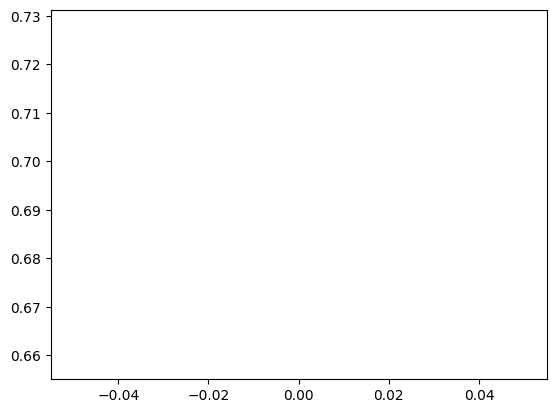

In [157]:
from public_tests import *

model_test(model)

0th cost: 0.6931471805599453
100th cost: 0.5845083636993086
200th cost: 0.46694904094655476
300th cost: 0.3760068669480209
400th cost: 0.33146328932825125
500th cost: 0.303273067474383
600th cost: 0.27987958658260487
700th cost: 0.2600421369258757
800th cost: 0.2429406846779662
900th cost: 0.2280042225672607
1000th cost: 0.21481951378449643
1100th cost: 0.20307819060644985
1200th cost: 0.19254427716706862
1300th cost: 0.18303333796883509
1400th cost: 0.17439859438448874
1500th cost: 0.1665213970540033
1600th cost: 0.15930451829756614
1700th cost: 0.15266732471296504
1800th cost: 0.14654223503982336
1900th cost: 0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
StG Method! test accuracy: 0.7
StG Method! train accuracy: 0.9904306220095693


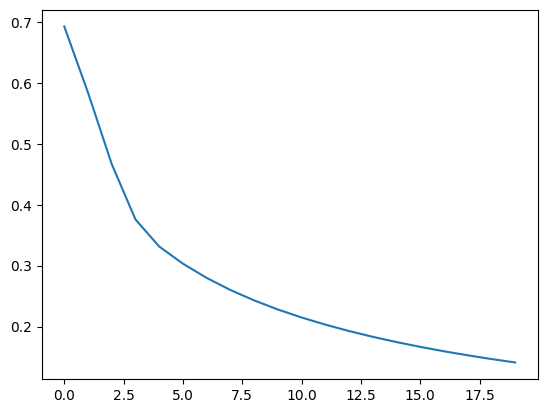

In [160]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)


0th cost: 0.6931471805599453
100th cost: 0.5845083636993086
200th cost: 0.46694904094655476
300th cost: 0.3760068669480209
400th cost: 0.33146328932825125
500th cost: 0.303273067474383
600th cost: 0.27987958658260487
700th cost: 0.2600421369258757
800th cost: 0.2429406846779662
900th cost: 0.2280042225672607
1000th cost: 0.21481951378449643
1100th cost: 0.20307819060644985
1200th cost: 0.19254427716706862
1300th cost: 0.18303333796883509
1400th cost: 0.17439859438448874
1500th cost: 0.1665213970540033
1600th cost: 0.15930451829756614
1700th cost: 0.15266732471296504
1800th cost: 0.14654223503982336
1900th cost: 0.1408720757031016
2000th cost: 0.1356080752591202
2100th cost: 0.1307083213047731
2200th cost: 0.12613655733642845
2300th cost: 0.12186123310162925
2400th cost: 0.11785474652704071
2500th cost: 0.11409283226927097
2600th cost: 0.11055406382501505
2700th cost: 0.10721944457861762
2800th cost: 0.10407206923216959
2900th cost: 0.10109684147524377
3000th cost: 0.09828023699678214
3

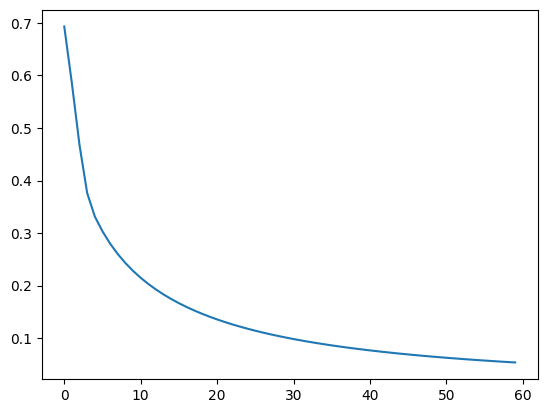

In [163]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=6000, learning_rate=0.005, print_cost=True)


y = 1, you predicted that it is a "non-cat" picture.


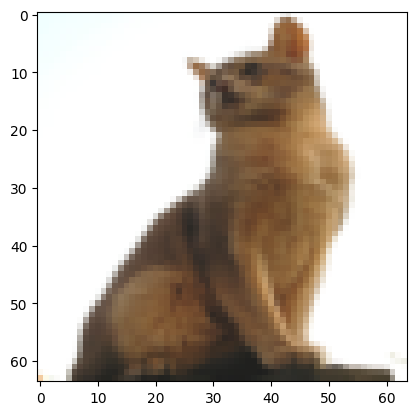

In [176]:
# Example of a picture that was wrongly classified.
index = 6
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

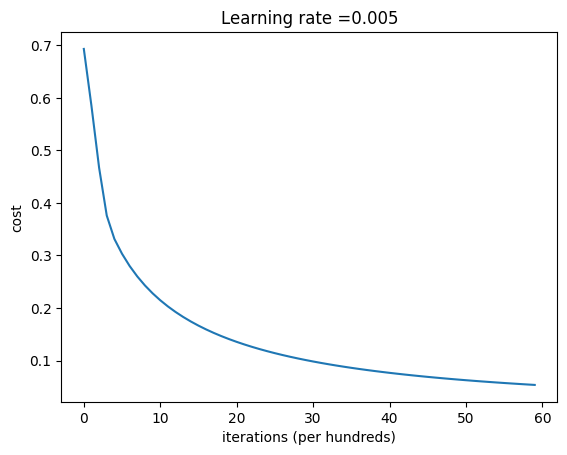

In [177]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01


StG Method! test accuracy: 0.6799999999999999
StG Method! train accuracy: 1.0

-------------------------------------------------------

Training a model with learning rate: 0.001
StG Method! test accuracy: 0.74
StG Method! train accuracy: 0.9617224880382775

-------------------------------------------------------

Training a model with learning rate: 0.0001
StG Method! test accuracy: 0.56
StG Method! train accuracy: 0.7607655502392344

-------------------------------------------------------



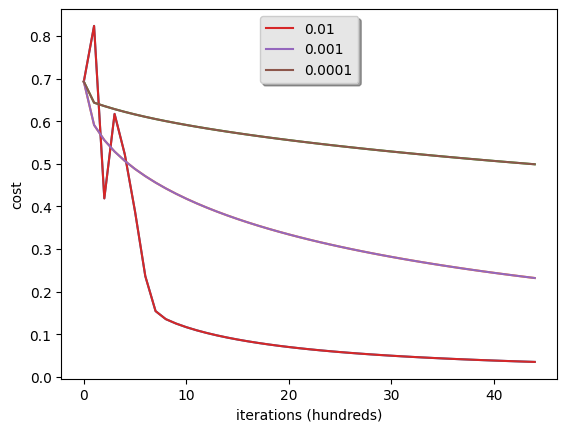

In [182]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=4500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()